# Distribution of Multiplication

In [14]:
# import required libraries
import sympy
import os
import matplotlib.pyplot as plt
import numpy as np
import math
from math import isqrt
from scipy.optimize import curve_fit
import matplotlib.gridspec as gridspec
from scipy.optimize import fsolve
from scipy.integrate import quad
dirpath = os.path.dirname(os.path.abspath(__doc__))

In [3]:
# define variables
front = 1 # thresholf to ignore fist x value of countlst
rango = 1000000 # range of positive integers to compute
threshold = 200 # higher countlst values are shown in plot
stack_size = 10000 # size of stacking for prime numbers

# define lists
x_data = list() # x-axis
countlst = list() # countlst[i] = x , where x is the possible multiplication ways to compute i
primelst = list() # where primerlst[i]==1 if i is prime
for i in range(rango):
    x_data.append(i)
    countlst.append(0)
    primelst.append(0)

## Computing

In [4]:
#computing countlst
for i in range(front, rango):
    for j in range(1, isqrt(i) + 1): #  iterating until sqrt(i) see section 'methods' in paper
        if i % j == 0: # adding 1 if a divisor is found
            countlst[i] += 1
            if j != i // j:
                countlst[i] += 1

# compute count mean and std dev
count_mean = np.average(countlst)
count_std_dev = np.std(countlst)
print(f'std.dev. = {count_std_dev}𝜎') # when running this block several times the stddev gets added (restart kernel to have realitistic stddev)
plot_count_mean = [count_mean for i in range(len(x_data))]

std.dev. = 15.03101666886758𝜎


In [5]:
# searching for primes
for i in range(rango):
    if sympy.isprime(i): # checking if number is prime
        primelst[i]=1
primes = [i for i in range(rango) if primelst[i] == 1] # list of prime number up to rango

# computing prime badges
histlst = list() # histlst[i] is density of primes at range i
primesstack = list() # primesstack[i] is total number of primes up to i
x_bar = [i for i in range(int(rango/stack_size))] # creating x-axis data for bar plot
for i in range(0, len(primelst), stack_size):
    chunk = primelst[i:i+stack_size] # get stack
    count_primes = sum(chunk) # sum all stack values
    histlst.append(count_primes)
for i in range(len(histlst)):
    if i==0:
        primesstack.append(histlst[i])
    else:
        primesstack.append(primesstack[i-1]+histlst[i])

In [6]:
# computing fits
x_data = np.array(x_data) # converting into numpy arrays
countlst = np.array(countlst)
slope, intercept = np.polyfit(x_data, countlst, 1) # fitting with numpy polyfit method
fit = slope*x_data + intercept # computing data for plot
print(f'Count fit: y = {slope}x+{intercept}')

x_bar_data = np.array(x_bar) # converting into numpy arrays
hist_data = np.array(histlst)
def exponential(x, a, b, c): # defining fit function
    return a * np.exp(-b * x) + c
params, covariance = curve_fit(exponential, x_bar_data, hist_data, maxfev=10000) # computing fit with scipy curve_fit method
a, b, c = params
primefit = exponential(x_bar_data, a, b, c) #computing data for plot
print(f'Prime fit: y = {a} * ^{b}*x +{c}')

Count fit: y = 3.0003395083061804e-06x+12.46981674601685
Prime fit: y = -1336813.3329218465 * ^-1.5240398565050634e-06*x +1337699.1671903762


/var/folders/cw/w_dkp82s3pxftfd_hqby60w80000gn/T/ipykernel_80721/3897629397.py:11: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


## Plotting

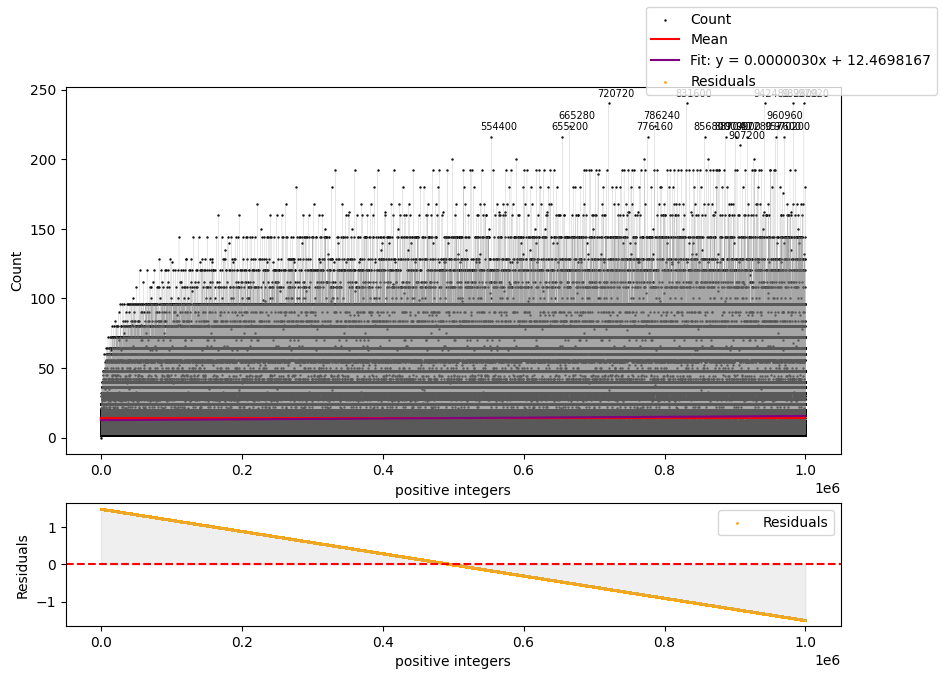

In [7]:
# plotting countfig
countfig = plt.figure(figsize=(10, 7))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# plot multiplication distribution
ax = countfig.add_subplot(gs[0])
ax.plot(x_data, countlst, color=(0.5, 0.5, 0.5, 0.7), linewidth=0.1)
ax.scatter(x_data, countlst, color='black', label='Count', marker='o', s=0.5)
ax.plot(x_data, plot_count_mean, color='red', label='Mean')
ax.plot(x_data, fit, color='purple', label=f'Fit: y = {slope:.7f}x + {intercept:.7f}')
for i in range(len(x_data)):
    if countlst[i] > threshold:
        plt.annotate(f'{x_data[i]}', (x_data[i], countlst[i]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=7)
ax.set_xlabel('positive integers')
ax.set_ylabel('Count')

# plot residuals between best-fit and mean
residuals = plot_count_mean-fit
ax2 = countfig.add_subplot(gs[1])
ax2.scatter(x_data, residuals, marker='o', label='Residuals', color='orange', s=1)
ax2.axhline(0, color='r', linestyle='--')
ax2.set_xlabel('positive integers')
ax2.set_ylabel('Residuals')
ax2.fill_between(x_data, residuals, color=(0.7, 0.7, 0.7, 0.2))
ax2.legend()

countfig.legend()
countfig.savefig(f'{dirpath}/106countfig.png', dpi=512)
# plt.show()

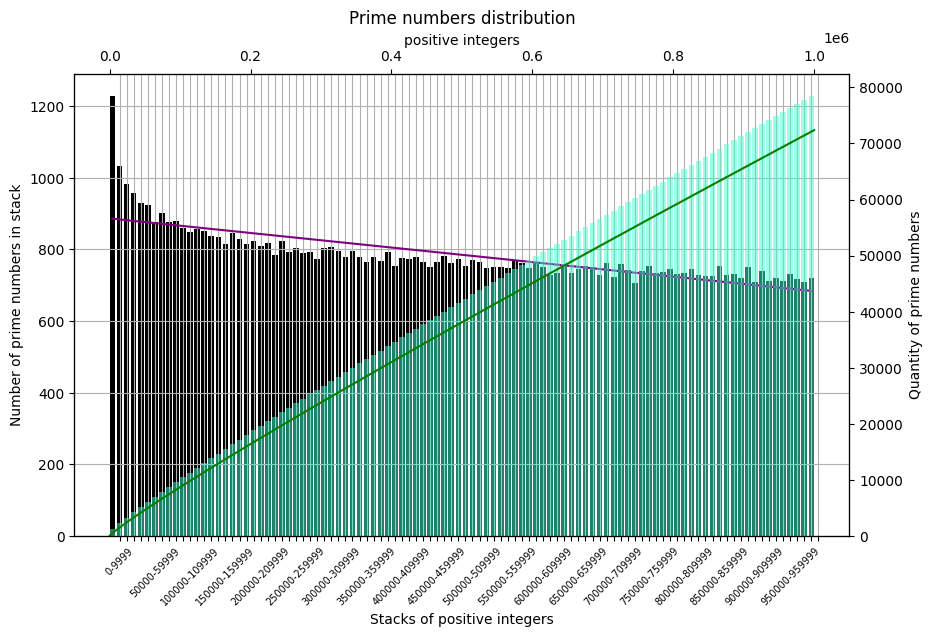

In [8]:
# plotting primefig
primefig, ax1 = plt.subplots(figsize=(10,6))
# plot prime number density
bars1 = ax1.bar(x_bar, histlst, color='black')
ax1.set_xticks(range(1, len(histlst) + 1))
ax1.set_xticklabels([f"{i * stack_size}-{(i + 1) * stack_size - 1}" for i in range(len(histlst))], rotation=45, fontsize=7)
labels = ax1.get_xticklabels()  # Get current labels
for i, label in enumerate(labels):
    if i % 5 != 0:  # Hide labels that are not multiples of 5
        label.set_visible(False)
ax1.set_xlabel('Stacks of positive integers')
ax1.set_ylabel('Number of prime numbers in stack')

# plot total primes
ax2 = ax1.twinx()
bars2 = ax2.bar(x_bar, primesstack, color=(0.25, 1.0, 0.82, 0.5))
ax2.set_ylabel('Quantity of prime numbers')


ax1.set_title('Prime numbers distribution')
ax1.grid(True)
primefig.savefig(f'{dirpath}/106primefig.png', dpi=512)
#plt.show()

# plot best-fit model
ax1.plot(x_bar_data, primefit, color='purple')

# computing prime theorem function
x_data = list()
y_data = list()
for i in range(0, rango):
    x_data.append(i)
    if i==0:
        y_data.append(0)
    else:
        try:
            #pi = i/(math.log10(i)) # x/log(x)
            pi = i/(math.log(i))
            y_data.append(pi)
        except ZeroDivisionError:
            y_data.append(0)

ax3 = ax2.twiny()
ax3.plot(x_data, y_data, label='π(x)', color='green')
ax3.set_xlabel('positive integers')
primefig.savefig(f'{dirpath}/106primetheorem.png', dpi=512)



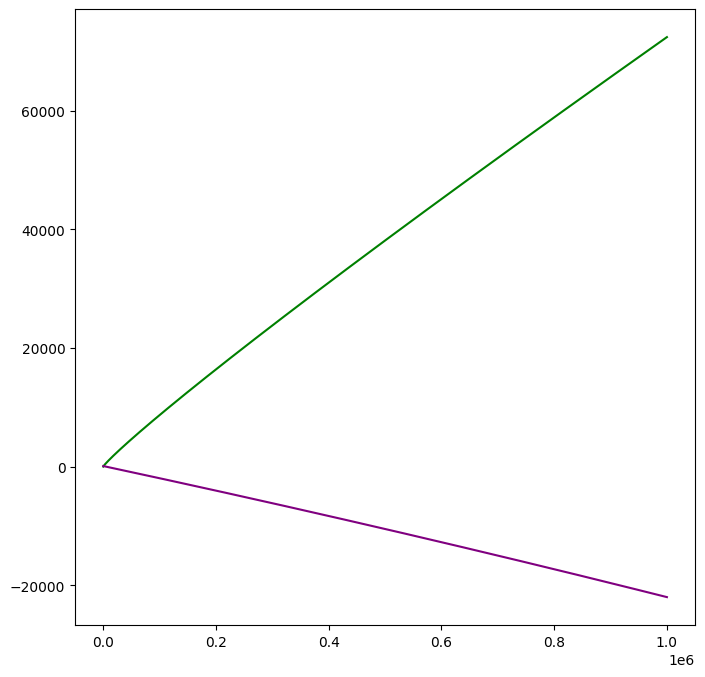

In [42]:
# logarithmic plot descreasing rate and total prime theorem
plt.figure(figsize=(8,8))
plt.plot(x_data, y_data, color='green')
def exponentialp(x):
    ap, bp, cp = -128390.42104270413, -0.00000015874774439859617, 128479.10024659803
    return ap * np.exp(-bp * float(x)) + cp
plt.plot(x_data, [exponentialp(x) for x in x_data], color='purple')
plt.show()

## Tests
We want to search for correlation between the models for different distributions.

In [22]:
# Compute MSD between total prime numbers and prime number theorem
prime_count = list()
prime_count = []
for i in range(front, rango + 1):
    if i == 0 or i == 1:
        prime_count.append(0)
    elif sympy.isprime(i):
        prime_count.append(prime_count[-1] + 1)
    else:
        prime_count.append(prime_count[-1])

def pi_approx(x):
    return x/np.log(x)

def squared_diff(x):
    x = int(x)
    approx_pi = pi_approx(x)
    return (approx_pi - prime_count[x])**2

a, b = front, rango
integral, error = quad(squared_diff, a, b)
msd = (1/(b - a)) * integral
print(msd)

14074333.039939027


/var/folders/cw/w_dkp82s3pxftfd_hqby60w80000gn/T/ipykernel_80721/3099984198.py:21: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, error = quad(squared_diff, a, b)


### Angle

In [21]:
# define functions
def exponential(x, a, b, c):
    return a * np.exp(-b * x) + c

def derivative_exponential(x, a, b):
    return -a * b * np.exp(-b * x)

In [22]:
# define paramenters for functions (printed in sections above)  
a = -128390.42104270413
b = -0.00000015874774439859617
c = 128479.1002465980
m2 = 0.0000030003395083049023
intercept2 = 12.469816746017331

In [23]:
# find intersection between graphs
def find_intersection(x):
    return exponential(x, a, b, c) - (m2 * x + intercept2)
x_intersect = fsolve(find_intersection, 0)[0] # using scipy fsolve to find intersection

In [29]:
# calculate slopes at intersection point
slope1 = derivative_exponential(x_intersect, a, b) # slope of exponential function is the coefficient of its derivative
slope2 = m2

# calculate angle at intersection point (difference angle to normal)
theta = np.arctan(abs((slope1 - slope2) / (1 + slope1 * slope2)))
theta_degrees = np.degrees(theta)
print(np.degrees(np.arctan(slope1/slope2)))

-89.99157062894403


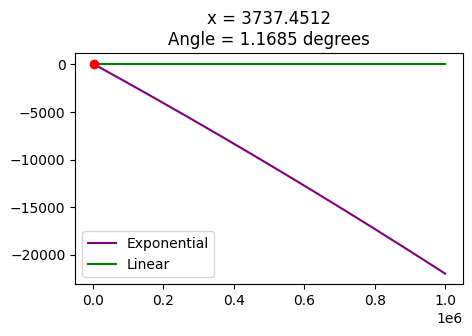

x = 3737.4512161630864284
Angle = 1.1684878225606370 degrees


In [27]:
# plot graphs
x_data = np.linspace(0, 1000000, 1000)
y1 = exponential(x_data, a, b, c)
y2 = m2 * x_data + intercept2
plt.figure(figsize=(5, 3))
plt.plot(x_data, y1, color='purple', label='Exponential')
plt.plot(x_data, y2, color='green', label='Linear')
plt.scatter([x_intersect], [exponential(x_intersect, a, b, c)], color='red', zorder=5)
plt.yscale('log')
plt.legend()
plt.title(f'x = {x_intersect:.4f}\nAngle = {theta_degrees:.4f} degrees')
plt.savefig(f'{dirpath}/quickplot.png', dpi=512)
plt.show()

print(f'x = {x_intersect:.16f}')
print(f'Angle = {theta_degrees:.16f} degrees')

### Slopes

In [27]:
slopes = slope1 * slope2
print(f"m1 (exp) = {slope1:.16f}")
print(f"m2 (linear) = {slope2:.16f}")
print(f"m1 * m2 = {slopes:.16f}")


m1 (exp) = -0.0203937860310898
m2 (linear) = 0.0000030003395083
m1 * m2 = -0.0000000611882820
